In [1]:
!pip install plotly
!pip install cufflinks

     ---------------------------------------- 0.0/81.7 kB ? eta -:--:--
     ---------------------------------------- 81.7/81.7 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68725 sha256=66ffdc6a7c45eac7f2d9249a241dccf3dc61cceeb8b401cceb0c9bc10a84b201
  Stored in directory: c:\users\82106\appdata\local\pip\cache\wheels\c3\bf\8f\afa0730b29e347e8c1071049f89748c1262e7a14a838820ae6
Successfully built cufflinks


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

%matplotlib inline

In [3]:
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False
df = pd.read_csv("data/school_report_ver2.csv", encoding="cp949")

In [4]:
df.head(10)

,성별,전공,신장,몸무게,1학년평균성적,2학년평균성적,3학년평균성적,취미,일평균학습시간,집중공부시간,기대연봉,전공만족여부,전공관련취업선호도,일평균소셜미디어사용시간,통학시간,학업스트레스,교우관계스트레스,아르바이트여부,방과후수업여부
0,Male,BCA,100.0,58.0,79.0,65.00,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,나쁨,나쁨,No,No
1,Female,BCA,90.0,40.0,70.0,80.00,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,나쁨,나쁨,No,No
2,Male,BCA,159.0,78.0,69.5,61.00,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,끔찍함,나쁨,No,Yes
3,Female,BCA,147.0,20.0,70.0,59.00,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,나쁨,좋음,No,Yes
4,Male,BCA,170.0,54.0,40.0,65.00,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,좋음,좋음,No,No
5,Female,BCA,139.0,33.0,90.0,75.00,70.0,Cinema,30 - 60 minute,Night,20000,Yes,50%,30 - 60 Minute,0 - 30 minutes,나쁨,좋음,No,Yes
6,Male,BCA,165.0,50.0,70.0,63.00,3.0,Reading books,1 - 2 Hour,Morning,15000,Yes,75%,1 - 1.30 hour,1 - 1.30 hour,좋음,좋음,No,Yes
7,Male,BCA,152.0,43.0,61.6,61.67,75.0,Sports,1 - 2 Hour,Morning,25000,Yes,50%,1 - 1.30 hour,1 - 1.30 hour,좋음,좋음,No,No
8,Male,BCA,190.0,85.0,88.2,67.50,60.0,Video Games,0 - 30 minute,Morning,20000,Yes,75%,1.30 - 2 hour,1 - 1.30 hour,나쁨,나쁨,No,No
9,Male,BCA,150.0,84.0,60.0,65.00,70.0,Video Games,0 - 30 minute,Anytime,20000,Yes,75%,30 - 60 Minute,30 - 60 minutes,좋음,좋음,No,No


In [5]:
df.columns

Index(['성별', '전공', '신장', '몸무게', '1학년평균성적', '2학년평균성적', '3학년평균성적', '취미',
       '일평균학습시간', '집중공부시간', '기대연봉', '전공만족여부', '전공관련취업선호도', '일평균소셜미디어사용시간',
       '통학시간', '학업스트레스', '교우관계스트레스', '아르바이트여부', '방과후수업여부'],
      dtype='object')

In [6]:
df.shape

(235, 19)

In [7]:
df.isnull().sum()

성별              0
전공              0
신장              0
몸무게             0
1학년평균성적         0
2학년평균성적         0
3학년평균성적         0
취미              0
일평균학습시간         0
집중공부시간          0
기대연봉            0
전공만족여부          0
전공관련취업선호도       0
일평균소셜미디어사용시간    0
통학시간            0
학업스트레스          0
교우관계스트레스        0
아르바이트여부         0
방과후수업여부         0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   성별            235 non-null    object 
 1   전공            235 non-null    object 
 2   신장            235 non-null    float64
 3   몸무게           235 non-null    float64
 4   1학년평균성적       235 non-null    float64
 5   2학년평균성적       235 non-null    float64
 6   3학년평균성적       235 non-null    float64
 7   취미            235 non-null    object 
 8   일평균학습시간       235 non-null    object 
 9   집중공부시간        235 non-null    object 
 10  기대연봉          235 non-null    int64  
 11  전공만족여부        235 non-null    object 
 12  전공관련취업선호도     235 non-null    object 
 13  일평균소셜미디어사용시간  235 non-null    object 
 14  통학시간          235 non-null    object 
 15  학업스트레스        235 non-null    object 
 16  교우관계스트레스      235 non-null    object 
 17  아르바이트여부       235 non-null    object 
 18  방과후수업여부       235 non-null    

In [9]:
df.describe()

,신장,몸무게,1학년평균성적,2학년평균성적,3학년평균성적,기대연봉
count,235.000000,235.000000,235.000000,235.000000,235.000000,2.350000e+02
mean,157.402128,60.803830,76.842128,68.780128,70.660553,3.248168e+04
std,21.510805,14.895844,13.050800,11.016533,15.727446,1.113146e+05
min,4.500000,20.000000,7.400000,45.000000,1.000000,0.000000e+00
25%,152.000000,50.000000,70.000000,60.000000,60.000000,1.500000e+04
50%,160.000000,60.000000,80.000000,69.000000,70.000000,2.000000e+04
75%,170.000000,70.000000,86.250000,76.000000,80.000000,2.500000e+04
max,192.000000,106.000000,98.000000,94.000000,100.000000,1.500000e+06


Text(0, 0.5, '성적')

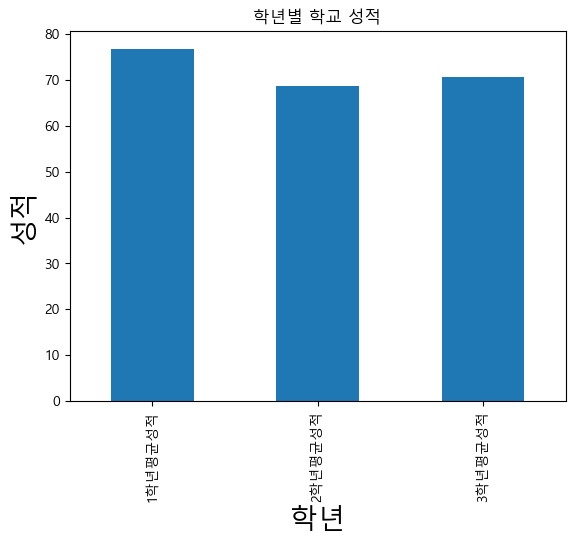

In [10]:
df[["1학년평균성적","2학년평균성적","3학년평균성적"]].mean().plot(kind='bar',
                                               title="학년별 학교 성적")
plt.xlabel("학년", fontsize=20)
plt.ylabel("성적",fontsize=20)

In [11]:
df["성별"].value_counts()

Male      156
Female     79
Name: 성별, dtype: int64

In [12]:
df["성별"].size

235

In [13]:
df = df.astype({"1학년평균성적":"int", "2학년평균성적":"int", "3학년평균성적":"int"})

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   성별            235 non-null    object 
 1   전공            235 non-null    object 
 2   신장            235 non-null    float64
 3   몸무게           235 non-null    float64
 4   1학년평균성적       235 non-null    int32  
 5   2학년평균성적       235 non-null    int32  
 6   3학년평균성적       235 non-null    int32  
 7   취미            235 non-null    object 
 8   일평균학습시간       235 non-null    object 
 9   집중공부시간        235 non-null    object 
 10  기대연봉          235 non-null    int64  
 11  전공만족여부        235 non-null    object 
 12  전공관련취업선호도     235 non-null    object 
 13  일평균소셜미디어사용시간  235 non-null    object 
 14  통학시간          235 non-null    object 
 15  학업스트레스        235 non-null    object 
 16  교우관계스트레스      235 non-null    object 
 17  아르바이트여부       235 non-null    object 
 18  방과후수업여부       235 non-null    

In [15]:
df["성별"].value_counts()

Male      156
Female     79
Name: 성별, dtype: int64

In [16]:
male = df[df["성별"]=="Male"].sample(n=79) # random sampling

In [17]:
male

,성별,전공,신장,몸무게,1학년평균성적,2학년평균성적,3학년평균성적,취미,일평균학습시간,집중공부시간,기대연봉,전공만족여부,전공관련취업선호도,일평균소셜미디어사용시간,통학시간,학업스트레스,교우관계스트레스,아르바이트여부,방과후수업여부
222,Male,Commerce,160.0,50.0,85,80,60,Sports,30 - 60 minute,Night,100,Yes,75%,1 - 1.30 hour,0 - 30 minutes,좋음,나쁨,No,Yes
204,Male,Commerce,165.0,60.0,55,50,60,Sports,0 - 30 minute,Morning,13000,Yes,50%,1 - 30 Minute,1 - 1.30 hour,좋음,나쁨,No,Yes
186,Male,B.com ISM,168.0,48.0,70,60,50,Sports,30 - 60 minute,Morning,40000,Yes,75%,1 - 30 Minute,more than 3 hour,나쁨,나쁨,No,Yes
103,Male,BCA,170.0,65.0,90,64,80,Reading books,30 - 60 minute,Anytime,20000,Yes,75%,1 - 30 Minute,1 - 1.30 hour,나쁨,나쁨,No,Yes
85,Male,BCA,177.0,75.0,60,60,50,Cinema,30 - 60 minute,Morning,25000,Yes,75%,1 - 1.30 hour,1 - 1.30 hour,좋음,나쁨,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,Male,B.com ISM,173.0,92.0,54,65,2,Cinema,0 - 30 minute,Anytime,23000,Yes,100%,More than 2 hour,1 - 1.30 hour,좋음,좋음,No,Yes
142,Male,BCA,182.0,58.0,80,60,65,Sports,1 - 2 Hour,Night,25000,Yes,50%,30 - 60 Minute,30 - 60 minutes,나쁨,좋음,No,Yes
171,Male,Commerce,178.0,60.0,70,60,60,Sports,2 - 3 hour,Morning,25000,Yes,50%,1 - 30 Minute,30 - 60 minutes,좋음,나쁨,Yes,Yes
13,Male,BCA,160.0,52.0,50,55,50,Cinema,0 - 30 minute,Anytime,17,Yes,75%,30 - 60 Minute,1.30 - 2 hour,좋음,끔찍함,No,No


In [18]:
female = df[df["성별"]=="Female"]

In [19]:
new_df = pd.concat([male,female])

In [20]:
new_df.head(100)

,성별,전공,신장,몸무게,1학년평균성적,2학년평균성적,3학년평균성적,취미,일평균학습시간,집중공부시간,기대연봉,전공만족여부,전공관련취업선호도,일평균소셜미디어사용시간,통학시간,학업스트레스,교우관계스트레스,아르바이트여부,방과후수업여부
222,Male,Commerce,160.0,50.0,85,80,60,Sports,30 - 60 minute,Night,100,Yes,75%,1 - 1.30 hour,0 - 30 minutes,좋음,나쁨,No,Yes
204,Male,Commerce,165.0,60.0,55,50,60,Sports,0 - 30 minute,Morning,13000,Yes,50%,1 - 30 Minute,1 - 1.30 hour,좋음,나쁨,No,Yes
186,Male,B.com ISM,168.0,48.0,70,60,50,Sports,30 - 60 minute,Morning,40000,Yes,75%,1 - 30 Minute,more than 3 hour,나쁨,나쁨,No,Yes
103,Male,BCA,170.0,65.0,90,64,80,Reading books,30 - 60 minute,Anytime,20000,Yes,75%,1 - 30 Minute,1 - 1.30 hour,나쁨,나쁨,No,Yes
85,Male,BCA,177.0,75.0,60,60,50,Cinema,30 - 60 minute,Morning,25000,Yes,75%,1 - 1.30 hour,1 - 1.30 hour,좋음,나쁨,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,Female,Commerce,159.0,67.0,98,80,85,Reading books,1 - 2 Hour,Anytime,15000,Yes,100%,1.30 - 2 hour,more than 3 hour,좋음,나쁨,No,Yes
54,Female,Commerce,180.0,43.0,86,78,85,Reading books,1 - 2 Hour,Anytime,10000,Yes,75%,1.30 - 2 hour,30 - 60 minutes,나쁨,좋음,No,Yes
56,Female,Commerce,156.0,52.0,82,70,80,Reading books,2 - 3 hour,Morning,15000,Yes,100%,1 - 30 Minute,0 - 30 minutes,너무 좋음,나쁨,Yes,Yes
57,Female,Commerce,167.0,62.0,80,60,60,Sports,1 - 2 Hour,Morning,18000,Yes,75%,1 - 1.30 hour,1 - 1.30 hour,좋음,좋음,No,Yes


In [21]:
new_df["1"]= new_df["1학년평균성적"].mean()
new_df["2"]= new_df["2학년평균성적"].mean()
new_df["3"]= new_df["3학년평균성적"].mean()

<Axes: ylabel='1학년평균성적'>

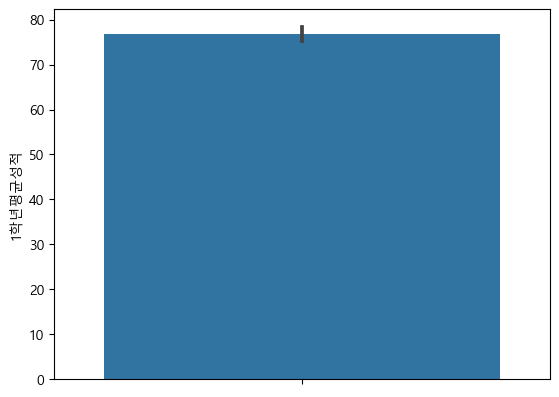

In [22]:
sns.barplot(data=df, y="1학년평균성적", hue="성별")

In [24]:
new_df["성적"]=100
new_df

,성별,전공,신장,몸무게,1학년평균성적,2학년평균성적,3학년평균성적,취미,일평균학습시간,집중공부시간,...,일평균소셜미디어사용시간,통학시간,학업스트레스,교우관계스트레스,아르바이트여부,방과후수업여부,1,2,3,성적
222,Male,Commerce,160.0,50.0,85,80,60,Sports,30 - 60 minute,Night,...,1 - 1.30 hour,0 - 30 minutes,좋음,나쁨,No,Yes,76.588608,68.702532,71.35443,100
204,Male,Commerce,165.0,60.0,55,50,60,Sports,0 - 30 minute,Morning,...,1 - 30 Minute,1 - 1.30 hour,좋음,나쁨,No,Yes,76.588608,68.702532,71.35443,100
186,Male,B.com ISM,168.0,48.0,70,60,50,Sports,30 - 60 minute,Morning,...,1 - 30 Minute,more than 3 hour,나쁨,나쁨,No,Yes,76.588608,68.702532,71.35443,100
103,Male,BCA,170.0,65.0,90,64,80,Reading books,30 - 60 minute,Anytime,...,1 - 30 Minute,1 - 1.30 hour,나쁨,나쁨,No,Yes,76.588608,68.702532,71.35443,100
85,Male,BCA,177.0,75.0,60,60,50,Cinema,30 - 60 minute,Morning,...,1 - 1.30 hour,1 - 1.30 hour,좋음,나쁨,No,No,76.588608,68.702532,71.35443,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Female,Commerce,167.0,65.0,93,85,90,Reading books,1 - 2 Hour,Night,...,30 - 60 Minute,30 - 60 minutes,좋음,좋음,No,Yes,76.588608,68.702532,71.35443,100
229,Female,B.com ISM,153.0,60.0,60,70,70,Sports,1 - 2 Hour,Anytime,...,1 - 1.30 hour,0 - 30 minutes,좋음,나쁨,No,No,76.588608,68.702532,71.35443,100
232,Female,BCA,139.0,33.0,90,75,70,Cinema,30 - 60 minute,Night,...,30 - 60 Minute,2.30 - 3 hour,나쁨,좋음,No,Yes,76.588608,68.702532,71.35443,100
233,Female,Commerce,153.0,58.0,85,74,75,Cinema,0 - 30 minute,Anytime,...,More than 2 hour,2.30 - 3 hour,끔찍함,좋음,No,Yes,76.588608,68.702532,71.35443,100


In [25]:
new_df=pd.melt(new_df,id_vars=["성별"],value_vars=["1학년평균성적","2학년평균성적","3학년평균성적"])

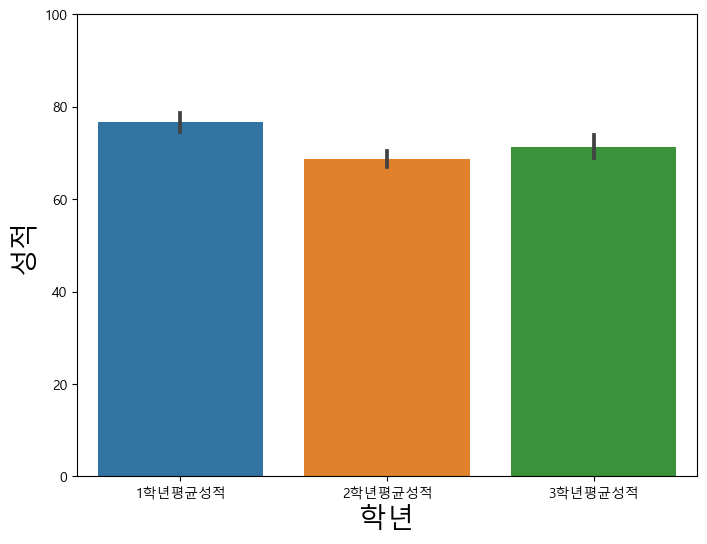

In [26]:
plt.figure(figsize=(8,6))

sns.barplot(data=new_df,x="variable",y="value",dodge=True)
plt.rc("font", family="Malgun Gothic")
plt.yticks([0,20,40,60,80,100])
plt.ylabel('성적',fontsize = 20)
plt.xlabel('학년',fontsize = 20)
plt.show()

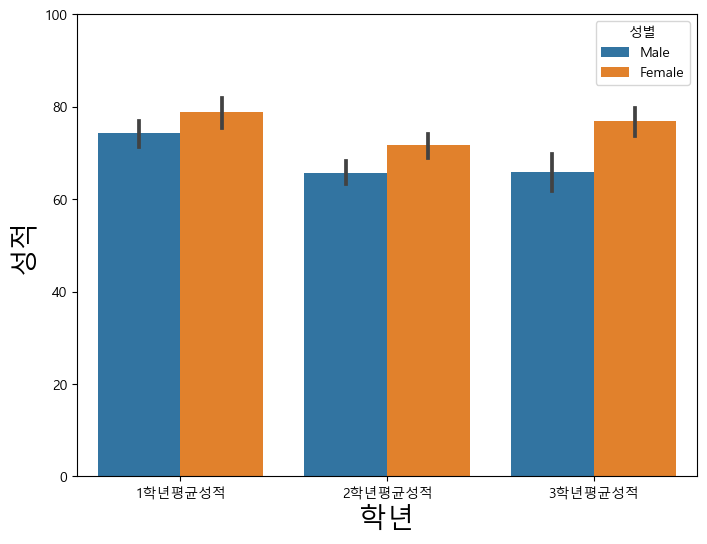

In [27]:
plt.figure(figsize=(8,6))

sns.barplot(data=new_df,x="variable",y="value",hue="성별",dodge=True)
plt.rc("font", family="Malgun Gothic")
plt.yticks([0,20,40,60,80,100])
plt.ylabel('성적',fontsize = 20)
plt.xlabel('학년',fontsize = 20)
plt.show()

In [28]:
new_df

,성별,variable,value
0,Male,1학년평균성적,85
1,Male,1학년평균성적,55
2,Male,1학년평균성적,70
3,Male,1학년평균성적,90
4,Male,1학년평균성적,60
...,...,...,...
469,Female,3학년평균성적,90
470,Female,3학년평균성적,70
471,Female,3학년평균성적,70
472,Female,3학년평균성적,75
